# **Context for todays class**
Topics covered
First we look at what linear regression is, then we define the loss function. We learn how the gradient descent algorithm works and finally we will implement it on a given data set and make predictions.
1. Cost/Loss function `(MSE, RMSE)`
2. Gradient Descent algorithmn
3. Learning Rate

<img src="https://doimages.nyc3.cdn.digitaloceanspaces.com/010AI-ML/content/images/2018/05/challenges-1.png">

**Gradient descent is a optimization algorithmn used in linear regression to find the best fit line to data. It work by gradually adjusting slope and intercept of line to reduce the difference between predicted values and actual target values.**

# **Loss Function**
In deep learning, loss functions help models determine how wrong it is and improve itself based on that wrongness. They are mathematical functions that quantify the difference between predicted and actual values in a machine learning model, but this isn’t all they do.

* Loss function is also referred to as cost function or error function.

* A loss function quantifies how well a model performs during training phase.

* The loss function estimates how well a particular algorithm models the provided data. Loss functions are classified into two classes based on the type of learning task

* The inputs are the predictions from the model as well as the ground truths and the output is some number known as the loss. The loss quantifies how good or bad the the prediction of the model was.

* Therefore, depending on the type of problem, the loss function could be anything.

# **As we know loss function or cost function is mathematically represented as `(Ypred - Yactual)`**

Here yᵢ is the actual value and ȳᵢ is the predicted value. Lets substitute the value of ȳᵢ:



# **Cost Function**

<img src="https://pub-0e72c0a148e1456eadfe14d9e2e3c5ab.r2.dev/cost%20function.JPG">




##**Gradient Descent Algorithmn**
For the sake of simplicity, let us assume our network has only two parameters. In practice, this number would be around a billion, but we’ll still stick to the two-parameter example throughout the post to not drive ourselves nuts while trying to visualize things. The contour of a very nice loss function may look like this.

<img src="https://doimages.nyc3.cdn.digitaloceanspaces.com/010AI-ML/content/images/2018/05/68747470733a2f2f707669676965722e6769746875622e696f2f6d656469612f696d672f70617274312f6772616469656e745f64657363656e742e676966.gif">

# **Gradient Descent Algorithmn from scratch**

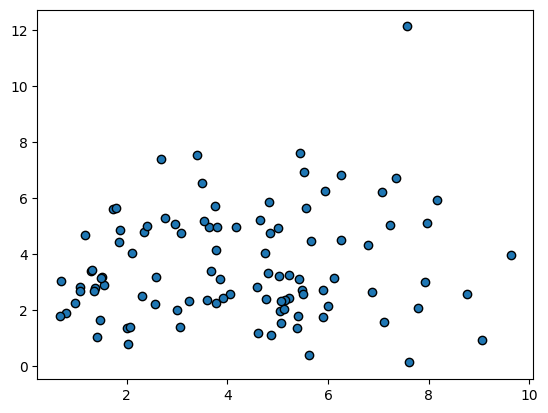

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = np.random.rayleigh(3,200)
data = data.reshape(100,2)
data = pd.DataFrame(data)


X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y, edgecolors="k")
plt.show()

In [ ]:
m = 0
c = 0

L = 0.01  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent
for i in range(epochs):
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

print (m, c)

0.11055376342163464 3.1289678207366536


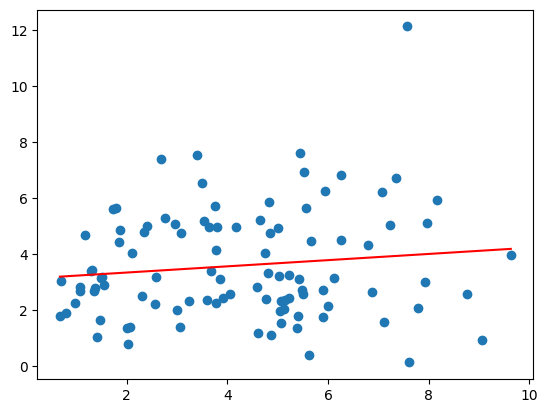

In [ ]:
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

# **#Gradient Descent Algorithmn**

In [ ]:
from sklearn.datasets import load_breast_cancer
features , target = load_breast_cancer(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.22, random_state=42)

from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.01)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
reg.coef_, reg.intercept_

(array([-1.95693076e+11, -3.00937206e+11, -1.47669260e+12, -1.48910671e+12,
        -1.54926190e+10, -2.26183021e+10,  2.15863019e+10,  9.94395813e+08,
        -2.99115784e+10, -7.98742972e+09, -4.93962853e+10, -1.17256040e+11,
        -2.20090840e+11, -1.28309950e+13, -8.66726904e+08,  1.19654690e+09,
         2.65170107e+10,  2.20665855e+09,  2.76680366e+08, -4.07947431e+07,
        -1.16534570e+10, -1.66634055e+12,  1.76138185e+12, -1.88550083e+11,
        -3.20334371e+10, -6.35252235e+10,  1.29096880e+10, -2.16224091e+10,
         5.45407857e+09, -1.22833549e+10]),
 array([-6.0151637e+10]))

##**Gradient Descent TensorFlow**
This example uses Mean Squared Error as the loss function and Stochastic Gradient Descent as the optimizer.


docs https://keras.io/2/api/losses/



In [ ]:
import tensorflow as tf

X = tf.random.normal((100, 10))
y = tf.random.normal((100, 1))

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Compile with loss function & optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mean_squared_error')

model.fit(X, y, epochs=10, batch_size=8)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9707  
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4610 
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1799 
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8039 
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9165 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7260 
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5995 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4987 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6016 
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7000 
